# EE4375-2022: Second Lab Session: Reference Solutions for the Poisson Equation on the Unit Interval

Generates reference solutions for the Poisson equation in one dimension. We solve $u''(x) = -1$ for $x \in \Omega=(0,1)$ with boundary conditions $u(x=0)=0$ and $u'(x=1) = \alpha$ for various values of $\alpha$ in three ways. We first plot the analytical reference solutions. Next we solve symbolically. Finally, we solve numerically using an in-build function. This notebook in written in Python as the symbolic computation capabilities in e.g. Symbolics.jl does not yet provide integration functions.  

Exercise: change the source function, the Dirichlet and the Neumann boundary condition. 

## Section 1/3: Plot the analytical solution

Plots the analytically (pen and paper) solution for three values of $\alpha$. 

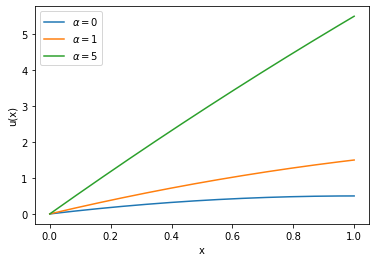

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def u(x,a):
    return -0.5*x**2+(a+1)*x

x = np.linspace(0,1,1000)
alpha = [0,1,5]

for a in alpha:
    plt.plot(x,u(x,a),label = r'$\alpha = $'+f'{a}')
    
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()

## Section 2/3: Solve symbolically using the sympy.dsolve() function

Solves $u''(x)+1=0$ or $u''(x) = -1$ symbolically for three values of $\alpha$.

Eq(u(x), -x**2/2 + x*(A + 1))


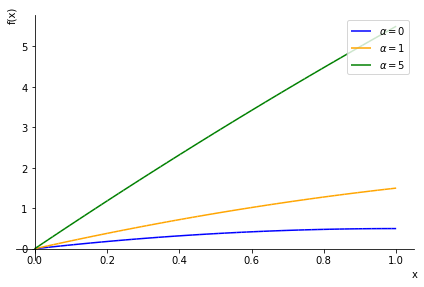

In [2]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols, solve
from sympy.abc import x
import sympy
import math

u = Function('u')
A = sympy.symbols('A')
x = sympy.symbols('x')

sol = dsolve(Derivative(-u(x), x, x) -1, u(x),ics = {u(0): 0, u(x).diff(x,1).subs(x,1):A})

print(sol)

p1 = None

color = {0:'blue', 1:'orange',5:'green'}
for A in [0,1,5]:
    sol = dsolve(Derivative(-u(x), x, x) -1, u(x),ics = {u(0): 0, u(x).diff(x,1).subs(x,1):A})
    p0 = sympy.plot(sol.rhs, (x,0,1), label = r'$\alpha = $'+f'{A}', show = False, legend = True, line_color = color[A])
    
    if p1 is None:
        p1 = p0
    else:
        p1.append(p0[0])
    p0 = p1

p0.show()

## Section 3/3: Solve numerically using the scipy.integrate.solve_bvp() function

Solves $u''(x) = -1$ numerically for three values of $\alpha$. A so-called shooting implemented in the Python function scipy.integrate.solve_bvp() is used. 

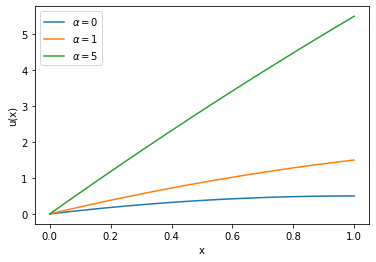

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

#system of differential equations
def diff(t,u):
    du1 = u[1,:]
    du2 = [-1]*len(du1)
    return np.array([du1,du2])

def bc(ua,ub):
    return np.array([ua[0], ub[1]-a])

t = np.linspace(0,1,101)
u = np.zeros((2,t.size))

for a in [0,1,5]:
    a = a
    sol = scipy.integrate.solve_bvp(diff, bc, t,u)
    plt.plot(sol.x, sol.y[0], label = r'$\alpha = $'+f'{a}')
    print()
    
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.show()